# Inclination Change

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../../src")
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as  plt
import matplotlib.dates as mdates
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

import models, coordinates, constants, auxiliary
from maneuvers import Maneuvers


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
#----- INITIAL CONDITIONS -----
# Explicit conditions
rp = constants.Re+50000e3
ra = constants.Re+50001e3
Omega = 30*np.pi/180
i = 2*np.pi/180#65.1*np.pi/180
omega = 30*np.pi/180
M = 332*np.pi/180
#-------------------
# Derived conditions
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
#--------------------
# Final conditions
coe = [a,e,i,omega,Omega,M]
date = datetime.now()
#coe,date = helpers.parseTle("suchai0.tle")

#----- SPACECRAFT DEFINITIONS -----
satellite = models.Cubesat("3U")
thruster = models.Thruster(thrust=5e-2,isp=720)
satellite.thruster = thruster

# ---- MANEUVERING ------
maneuvers = Maneuvers(coe,satellite,date)
#maneuvers.addPerturbation("atmosphere")
maneuvers.propagate(60*60*24*1,60)
maneuvers.addPerturbation("thrust")
def alphaCallback(coe):
    return 0
def betaCallback(coe):
    return 90*np.pi/180
maneuvers.thrustProfile = (alphaCallback,betaCallback)
%time maneuvers.propagate(60*60*18,60)
maneuvers.removePerturbation("thrust")
maneuvers.propagate(60*60*24*1,60)

Propagating...from day  0.0  to  1.0
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  1.0  to  1.75
The solver successfully reached the end of the integration interval. (Status Code: 0)

Wall time: 130 ms
Propagating...from day  1.75  to  2.75
The solver successfully reached the end of the integration interval. (Status Code: 0)



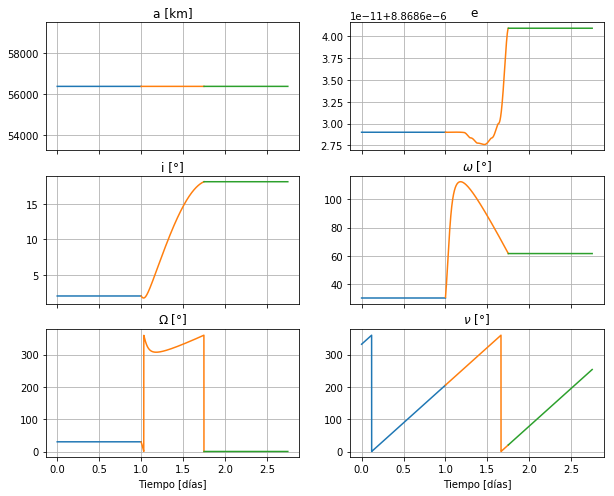

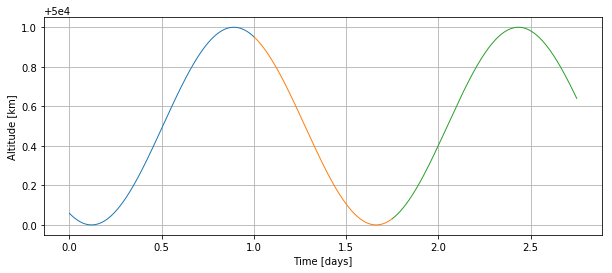

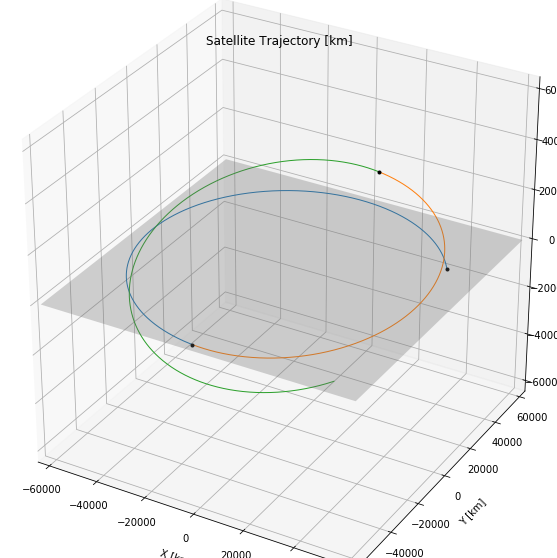

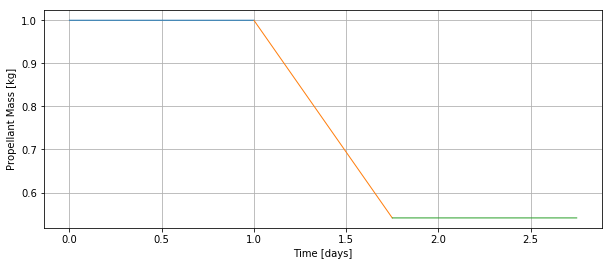

In [13]:
maneuvers.plot("coe");
maneuvers.plot("singleItem", (np.linalg.norm(maneuvers.history.r,axis=1)-constants.Re)/1000)
plt.ylabel("Altitude [km]")
maneuvers.plot("3d-trajectory")
maneuvers.plot("singleItem", maneuvers.history.propMass)
plt.ylabel("Propellant Mass [kg]");

In [14]:
maneuvers.makeReport()

------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Date/Time:
  Initial Date: 2019-01-21 11:46:21

Spacecraft:
  Wet Mass: 		3 kg
  Dry Mass: 		2.0 kg
  Propellant Mass: 	1.0 kg
  Drag Area: 		0.023333333333333334 m2
  Cd: 			2.2
  Cr: 			2

Thruster:
  Name/Model:		Generic Thruster
  Thrust (nominal):	0.05 N
  Isp (nominal):	720 s
  Power (nominal):	1 W

Solar Panels:
  Name/Model:			Generic Solar Panel
  Number of Panels:		1
  Individual Area:		0.010000000000000002 m2
  Total Power (nominal):	2.8000000000000007 W

Battery:
  Name/Model:		Generic Battery
  Cells Configuration:	8P-1S
  Voltage:		3.7 V
  Capacity:		7200 mAh
  Energy:		26.64 Wh
  Charge Power:		29.6 W
  Discharge Power:	29.6 W

Orbit:
  Semi-major axis (a): 		56378.5 km
  Eccentricity (e): 		9e-06
  Inclination (i): 		2.0 deg
  Argument of Perigee (omega): 	30.0 deg
  RAAN (Omega): 		30.0 deg
  True Anomaly (nu): 		332.0 deg

----STAGE 1----
Date/Time:
  Elapsed Time:	1 day, 0:01:00.055607
  Date at end 